# 보스턴 주택 가격 예측

## 선형 회귀

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
%matplotlib inline

In [13]:
# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)
bostonDF['PRICE'] = boston.target

In [14]:
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
bostonDF.shape

(506, 14)

In [4]:
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

* 각 컬럼별로 주택가격에 미치는 영향도를 조사

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

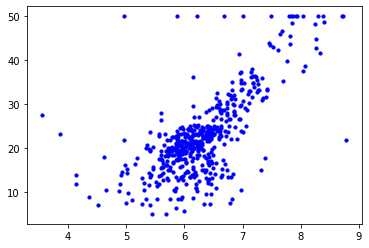

In [24]:
plt.scatter(boston.data[:,5], y_target, color='b', s=10)
# x축 : 방 개수(원본 데이터에서 모든 행* 5번째 인덱스 RM , y축 : 주택 가격

In [18]:
X_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [19]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
49,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
261,0.53412,20.0,3.97,0.0,0.6470,7.520,89.4,2.1398,5.0,264.0,13.0,388.37,7.26
503,0.06076,0.0,11.93,0.0,0.5730,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
72,0.09164,0.0,10.81,0.0,0.4130,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.12650,25.0,5.13,0.0,0.4530,6.762,43.4,7.9809,8.0,284.0,19.7,395.58,9.50
485,3.67367,0.0,18.10,0.0,0.5830,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58
418,73.53410,0.0,18.10,0.0,0.6790,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88


In [27]:
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)

In [10]:
print("lr.coef_: ", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_:  [-1.12979614e-01  6.55124002e-02  3.44366694e-02  3.04589777e+00
 -1.97958320e+01  3.35496880e+00  5.93713290e-03 -1.74185354e+00
  3.55884364e-01 -1.42954516e-02 -9.20180066e-01  1.03966156e-02
 -5.66182106e-01]
lr.intercept_: 40.99559517216467


In [28]:
print("훈련 세트 점수: {:.2f} ".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f} ".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.73 
테스트 세트 점수: 0.76 


In [51]:
from sklearn.metrics import mean_squared_error
lr_1 = LinearRegression()

x_lr1_2d = boston.data[:, 5]
x_lr1 = np.atleast_2d(x_lr1_2d)
x_lr1_t = np.transpose(x_lr1)



lr_1.fit(x_lr1_t, y_target)

y_target.shape

(506,)

In [52]:
y_predicted_lr_1 = lr.predict(x_lr1_t)
plt.plot(x_lr1_t, y_predicted_lr_1)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 13 is different from 1)

In [53]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_target, lr.predict(x_lr1_t))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 13 is different from 1)

In [ ]:
rmse = np.sqrt(mse)

In [49]:
x_poly = boston.data
y_poly = boston.target
lr.fit(x_poly, y_poly)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

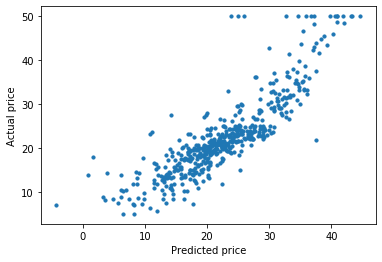

In [30]:
p = lr.predict(x_poly)
plt.scatter(p, y_poly, s=10)
plt.xlabel("Predicted price")
plt.ylabel("Actual price")

plt.show()